# Image Quality Analysis - Test Images

This notebook calculates image quality metrics for the test images:
- **Lighting Mean**: Average brightness of the image
- **Sharpness Metric**: Variance of Laplacian (focuses on center region for focus quality)
- **Contrast Metric**: Center-edge contrast (difference between object and background)

The results are exported to a CSV with columns for manual rating of scale and angles.

In [1]:
# Import required libraries and define image-quality helpers
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

# Rating labels used throughout the analysis
rating_labels = {1: 'Very Poor', 2: 'Poor', 3: 'Intermediate', 4: 'Good', 5: 'Very Good'}

def calculate_lighting_mean(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return float(np.mean(gray))

def calculate_variance_of_laplacian(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return float(laplacian.var())

def calculate_center_edge_contrast(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    height, width = gray.shape
    center_y, center_x = height / 2, width / 2
    radius = min(height, width) * 0.3  # 60% diameter circle
    y_coords, x_coords = np.ogrid[:height, :width]
    distances = np.sqrt((x_coords - center_x)**2 + (y_coords - center_y)**2)
    center_mask = distances < radius
    edge_mask = distances > (radius * 1.5)
    center_avg = float(np.mean(gray[center_mask]))
    edge_avg = float(np.mean(gray[edge_mask]))
    return abs(center_avg - edge_avg)

def analyze_image_quality(image_path):
    """Analyze all quality metrics for an image."""
    image = cv2.imread(str(image_path))
    if image is None:
        return None
    metrics = {
        'lighting_mean': round(calculate_lighting_mean(image), 2),
        'sharpness_metric': round(calculate_variance_of_laplacian(image), 2),
        'contrast_metric': round(calculate_center_edge_contrast(image), 2),
    }
    return metrics

print("Libraries and helper functions ready")

Libraries and helper functions ready


## Process All Test Images

Analyze all images in the `images/` folder and calculate metrics.

In [2]:
# Set path to images folder
images_folder = Path('images')

# Get all JPG files
image_files = sorted(images_folder.glob('*.jpg'))

print(f"Found {len(image_files)} images to analyze")
print("\nFirst 5 files:")
for img in image_files[:5]:
    print(f"  - {img.name}")

Found 121 images to analyze

First 5 files:
  - 1763539084792_Test_Isaam_p1_1.jpg
  - 1763539084792_Test_Isaam_p1_2.jpg
  - 1763539084792_Test_Isaam_p1_3.jpg
  - 1763539084792_Test_Isaam_p2_1.jpg
  - 1763539084792_Test_Isaam_p2_2.jpg


In [3]:
# Analyze all images
results = []

for img_path in image_files:
    print(f"Processing: {img_path.name}")
    
    metrics = analyze_image_quality(img_path)
    
    if metrics is not None:
        # Extract info from filename
        filename = img_path.name
        
        # Parse prototype from filename (p1, p2, or p3)
        prototype = None
        if '_p1_' in filename:
            prototype = 'p1'
        elif '_p2_' in filename:
            prototype = 'p2'
        elif '_p3_' in filename:
            prototype = 'p3'
        
        # Create result row
        result = {
            'filename': filename,
            'prototype': prototype,
            'lighting_mean': metrics['lighting_mean'],
            'sharpness_metric': metrics['sharpness_metric'],
            'contrast_metric': metrics['contrast_metric'],
            'scale_rating': '',  # Empty for manual rating
            'angle_rating': ''   # Empty for manual rating
        }
        
        results.append(result)
    else:
        print(f"  WARNING: Could not read image: {img_path.name}")

print(f"\nSuccessfully analyzed {len(results)} images")

Processing: 1763539084792_Test_Isaam_p1_1.jpg
Processing: 1763539084792_Test_Isaam_p1_2.jpg
Processing: 1763539084792_Test_Isaam_p1_3.jpg
Processing: 1763539084792_Test_Isaam_p2_1.jpg
Processing: 1763539084792_Test_Isaam_p2_2.jpg
Processing: 1763539084792_Test_Isaam_p2_3.jpg
Processing: 1763539084792_Test_Isaam_p3_1.jpg
Processing: 1763539084792_Test_Isaam_p3_2.jpg
Processing: 1763539084792_Test_Isaam_p3_3.jpg
Processing: 1763715576457_Sea_urchin__p1_1.jpg
Processing: 1763715576457_Sea_urchin__p2_1.jpg
Processing: 1763715576457_Sea_urchin__p2_2.jpg
Processing: 1763715576457_Sea_urchin__p2_3.jpg
Processing: 1763715576457_Sea_urchin__p3_1.jpg
Processing: 1763715576457_Sea_urchin__p3_2.jpg
Processing: 1763715576457_Sea_urchin__p3_3.jpg
Processing: 1763718463806_bone_p1_1.jpg
Processing: 1763718463806_bone_p1_2.jpg
Processing: 1763718463806_bone_p2_1.jpg
Processing: 1763718463806_bone_p3_1.jpg
Processing: 1763718463806_bone_p3_2.jpg
Processing: 1763718690026_Fossil__p1_1.jpg
Processing: 17

## Create DataFrame and Export to CSV

In [4]:
# Create DataFrame
df = pd.DataFrame(results)

# Display summary
print("DataFrame created with columns:")
print(df.columns.tolist())
print(f"\nShape: {df.shape}")
print("\nFirst few rows:")
print(df.head(10))

# Display statistics
print("\n" + "="*70)
print("METRIC STATISTICS")
print("="*70)
print(df[['lighting_mean', 'sharpness_metric', 'contrast_metric']].describe())

DataFrame created with columns:
['filename', 'prototype', 'lighting_mean', 'sharpness_metric', 'contrast_metric', 'scale_rating', 'angle_rating']

Shape: (121, 7)

First few rows:
                             filename prototype  lighting_mean  \
0   1763539084792_Test_Isaam_p1_1.jpg        p1         123.05   
1   1763539084792_Test_Isaam_p1_2.jpg        p1         126.28   
2   1763539084792_Test_Isaam_p1_3.jpg        p1         120.33   
3   1763539084792_Test_Isaam_p2_1.jpg        p2         125.63   
4   1763539084792_Test_Isaam_p2_2.jpg        p2         118.97   
5   1763539084792_Test_Isaam_p2_3.jpg        p2         118.38   
6   1763539084792_Test_Isaam_p3_1.jpg        p3         118.73   
7   1763539084792_Test_Isaam_p3_2.jpg        p3         123.62   
8   1763539084792_Test_Isaam_p3_3.jpg        p3         118.41   
9  1763715576457_Sea_urchin__p1_1.jpg        p1         104.37   

   sharpness_metric  contrast_metric scale_rating angle_rating  
0             24.35         

In [5]:
# Export to CSV
output_file = 'image_quality_metrics.csv'

if Path(output_file).exists():
    print(f"CSV already exists, not overwriting: {output_file}")
    print("If you want to regenerate, delete or rename the existing file first.")
else:
    df.to_csv(output_file, index=False)
    print(f"Results exported to: {output_file}")
    print(f"\nCSV contains {len(df)} rows with the following columns:")
    print("  - filename: Image filename")
    print("  - prototype: Prototype version (p1, p2, or p3)")
    print("  - lighting_mean: Mean brightness (0-255)")
    print("  - sharpness_metric: Variance of Laplacian (higher = sharper)")
    print("  - contrast_metric: Center-edge contrast (higher = better)")
    print("  - scale_rating: (empty - for manual rating)")
    print("  - angle_rating: (empty - for manual rating)")
    print("\nYou can now open the CSV and manually rate the scale and angles!")

CSV already exists, not overwriting: image_quality_metrics.csv
If you want to regenerate, delete or rename the existing file first.


## Visualize Metric Distributions by Prototype

C:\Users\megan\AppData\Local\Temp\ipykernel_18448\2837330701.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_proto, labels=['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(Real-Time)'],
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\2837330701.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_proto, labels=['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(Real-Time)'],
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\2837330701.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_proto, labels=['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(

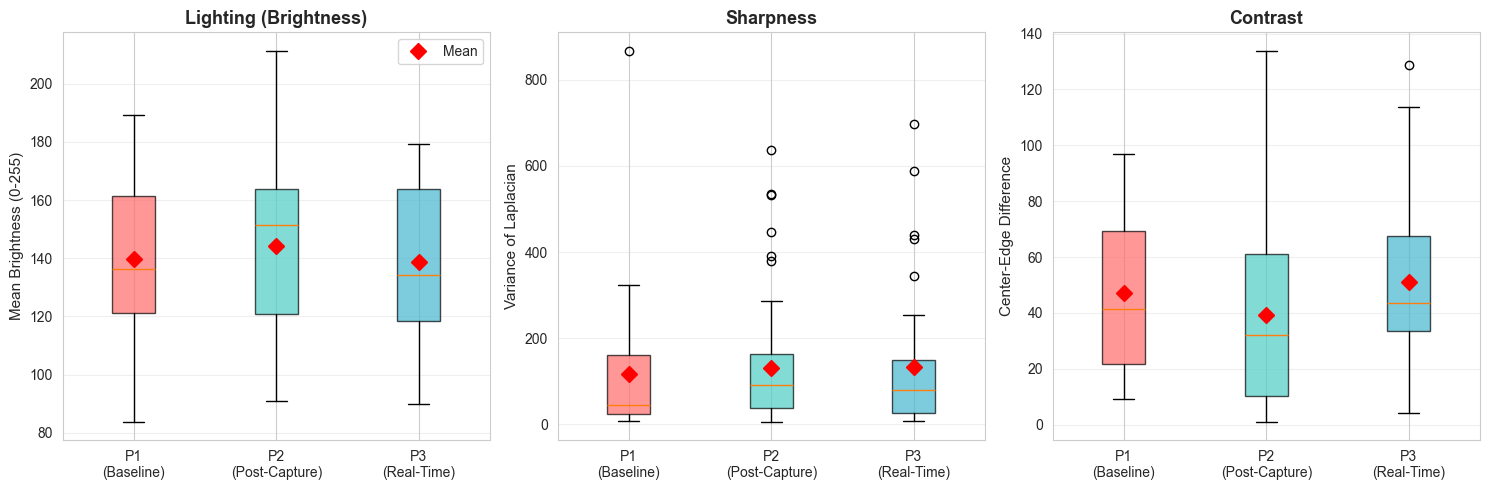


METRICS BY PROTOTYPE

P1: 26 images
  Lighting:  139.69 ± 25.69
  Sharpness: 116.49 ± 175.23
  Contrast:  47.27 ± 28.49

P2: 58 images
  Lighting:  144.09 ± 25.55
  Sharpness: 130.99 ± 141.44
  Contrast:  39.21 ± 34.73

P3: 37 images
  Lighting:  138.62 ± 26.31
  Sharpness: 133.20 ± 166.00
  Contrast:  51.09 ± 31.96


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 5)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_info = [
    ('lighting_mean', 'Lighting (Brightness)', 'Mean Brightness (0-255)'),
    ('sharpness_metric', 'Sharpness', 'Variance of Laplacian'),
    ('contrast_metric', 'Contrast', 'Center-Edge Difference')
]

for idx, (metric, title, ylabel) in enumerate(metrics_info):
    ax = axes[idx]
    
    # Create boxplot
    data_by_proto = [df[df['prototype'] == p][metric].dropna() for p in ['p1', 'p2', 'p3']]
    
    bp = ax.boxplot(data_by_proto, labels=['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(Real-Time)'],
                    patch_artist=True)
    
    # Color boxes
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add mean markers
    means = [df[df['prototype'] == p][metric].mean() for p in ['p1', 'p2', 'p3']]
    ax.plot(range(1, 4), means, 'D', color='red', markersize=8, label='Mean', zorder=5)

axes[0].legend()
plt.tight_layout()
plt.show()

# Print statistics by prototype
print("\n" + "="*70)
print("METRICS BY PROTOTYPE")
print("="*70)
for proto in ['p1', 'p2', 'p3']:
    proto_data = df[df['prototype'] == proto]
    print(f"\n{proto.upper()}: {len(proto_data)} images")
    print(f"  Lighting:  {proto_data['lighting_mean'].mean():.2f} ± {proto_data['lighting_mean'].std():.2f}")
    print(f"  Sharpness: {proto_data['sharpness_metric'].mean():.2f} ± {proto_data['sharpness_metric'].std():.2f}")
    print(f"  Contrast:  {proto_data['contrast_metric'].mean():.2f} ± {proto_data['contrast_metric'].std():.2f}")

## Metric Interpretation Guide

Understanding what the metric values mean:

### Lighting Mean (0-255)
Average brightness of the image. Based on the JavaScript thresholds:
- **< 60**: Very Poor (too dark)
- **60-90**: Poor (underexposed)
- **90-120**: Intermediate (acceptable but dim)
- **120-180**: Good (well-lit)
- **> 180**: Very Good (bright, may risk overexposure at very high values)

### Sharpness Metric (Variance of Laplacian)
Measures focus quality - higher values indicate sharper images:
- **< 40**: Very Blurry (out of focus)
- **40-80**: Blurry (poor focus)
- **80-110**: OK (acceptable focus)
- **110-150**: Good (sharp)
- **> 150**: Very Good (very sharp, crisp details)

### Contrast Metric (Center-Edge Difference)
Difference between specimen (center) and background (edges) - higher is better:
- **< 15**: Very Poor (specimen blends with background)
- **15-30**: Poor (weak separation)
- **30-40**: Intermediate (moderate separation)
- **40-60**: Good (clear separation)
- **> 60**: Very Good (excellent object-background contrast)

**Note:** These thresholds match the implementation in `image_quality.js` and are calibrated based on real device testing.

## Load Manually Rated Data

Load the CSV with your manual ratings for scale and angle.

In [7]:
# Load the CSV with manual ratings
df_rated = pd.read_csv('image_quality_metrics.csv')

# Ensure ratings are numeric (convert strings like '3' to numbers, blanks to NaN)
df_rated['scale_rating'] = pd.to_numeric(df_rated['scale_rating'], errors='coerce')
df_rated['angle_rating'] = pd.to_numeric(df_rated['angle_rating'], errors='coerce')

print(f"Loaded {len(df_rated)} images with manual ratings")
print(f"\nColumns: {df_rated.columns.tolist()}")
print(f"\nDataFrame shape: {df_rated.shape}")

# Check for missing values
print("\nMissing values:")
print(df_rated.isnull().sum())

# Display first few rows
print("\nFirst 10 rows:")
print(df_rated.head(10))

Loaded 120 images with manual ratings

Columns: ['filename', 'prototype', 'lighting_mean', 'sharpness_metric', 'contrast_metric', 'scale_rating', 'angle_rating']

DataFrame shape: (120, 7)

Missing values:
filename            0
prototype           0
lighting_mean       0
sharpness_metric    0
contrast_metric     0
scale_rating        0
angle_rating        0
dtype: int64

First 10 rows:
                             filename prototype  lighting_mean  \
0   1763539084792_Test_Isaam_p1_1.jpg        p1         123.05   
1   1763539084792_Test_Isaam_p1_2.jpg        p1         126.28   
2   1763539084792_Test_Isaam_p1_3.jpg        p1         120.33   
3   1763539084792_Test_Isaam_p2_1.jpg        p2         125.63   
4   1763539084792_Test_Isaam_p2_2.jpg        p2         118.97   
5   1763539084792_Test_Isaam_p2_3.jpg        p2         118.38   
6   1763539084792_Test_Isaam_p3_1.jpg        p3         118.73   
7   1763539084792_Test_Isaam_p3_2.jpg        p3         123.62   
8   1763539084792

## Analyze Manual Ratings

Analyze the scale and angle ratings you provided.

In [8]:
# Summary of manual ratings
# Rating scale: 1 = Very Poor, 2 = Poor, 3 = Intermediate, 4 = Good, 5 = Very Good
rating_labels = {1: 'Very Poor', 2: 'Poor', 3: 'Intermediate', 4: 'Good', 5: 'Very Good'}

print("="*70)
print("MANUAL RATING SUMMARY")
print("="*70)
print("\nRating Scale: 1=Very Poor, 2=Poor, 3=Intermediate, 4=Good, 5=Very Good")

# Scale ratings
print("\\nSCALE RATINGS:")
print("="*70)
scale_counts = df_rated['scale_rating'].value_counts().sort_index()
for rating, count in scale_counts.items():
    label = rating_labels.get(rating, f"Unknown ({rating})")
    print(f"  {rating} ({label}): {count}")
print(f"\nMean scale rating: {df_rated['scale_rating'].mean():.2f}")
print(f"Total images with scale rating: {df_rated['scale_rating'].notna().sum()}")

# Angle ratings
print("\\nANGLE RATINGS:")
print("="*70)
angle_counts = df_rated['angle_rating'].value_counts().sort_index()
for rating, count in angle_counts.items():
    label = rating_labels.get(rating, f"Unknown ({rating})")
    print(f"  {rating} ({label}): {count}")
print(f"\nMean angle rating: {df_rated['angle_rating'].mean():.2f}")
print(f"Total images with angle rating: {df_rated['angle_rating'].notna().sum()}")

# Ratings by prototype
print("\n" + "="*70)
print("MANUAL RATINGS BY PROTOTYPE")
print("="*70)
for proto in ['p1', 'p2', 'p3']:
    proto_data = df_rated[df_rated['prototype'] == proto]
    print(f"\n{proto.upper()}: {len(proto_data)} images")
    
    print(f"\n  Scale ratings:")
    scale_dist = proto_data['scale_rating'].value_counts().sort_index()
    for rating, count in scale_dist.items():
        label = rating_labels.get(rating, f"Unknown ({rating})")
        print(f"    {rating} ({label}): {count}")
    print(f"  Mean: {proto_data['scale_rating'].mean():.2f}")
    
    print(f"\n  Angle ratings:")
    angle_dist = proto_data['angle_rating'].value_counts().sort_index()
    for rating, count in angle_dist.items():
        label = rating_labels.get(rating, f"Unknown ({rating})")
        print(f"    {rating} ({label}): {count}")
    print(f"  Mean: {proto_data['angle_rating'].mean():.2f}")

MANUAL RATING SUMMARY

Rating Scale: 1=Very Poor, 2=Poor, 3=Intermediate, 4=Good, 5=Very Good
\nSCALE RATINGS:
  1 (Very Poor): 45
  2 (Poor): 18
  3 (Intermediate): 3
  4 (Good): 45
  5 (Very Good): 9

Mean scale rating: 2.62
Total images with scale rating: 120
\nANGLE RATINGS:
  1 (Very Poor): 13
  2 (Poor): 32
  3 (Intermediate): 28
  4 (Good): 8
  5 (Very Good): 39

Mean angle rating: 3.23
Total images with angle rating: 120

MANUAL RATINGS BY PROTOTYPE

P1: 26 images

  Scale ratings:
    1 (Very Poor): 12
    2 (Poor): 4
    4 (Good): 7
    5 (Very Good): 3
  Mean: 2.42

  Angle ratings:
    1 (Very Poor): 2
    2 (Poor): 12
    3 (Intermediate): 6
    4 (Good): 3
    5 (Very Good): 3
  Mean: 2.73

P2: 58 images

  Scale ratings:
    1 (Very Poor): 14
    2 (Poor): 11
    4 (Good): 30
    5 (Very Good): 3
  Mean: 2.95

  Angle ratings:
    1 (Very Poor): 6
    2 (Poor): 9
    3 (Intermediate): 12
    4 (Good): 2
    5 (Very Good): 29
  Mean: 3.67

P3: 36 images

  Scale ratings:


## Visualize Manual Ratings by Prototype

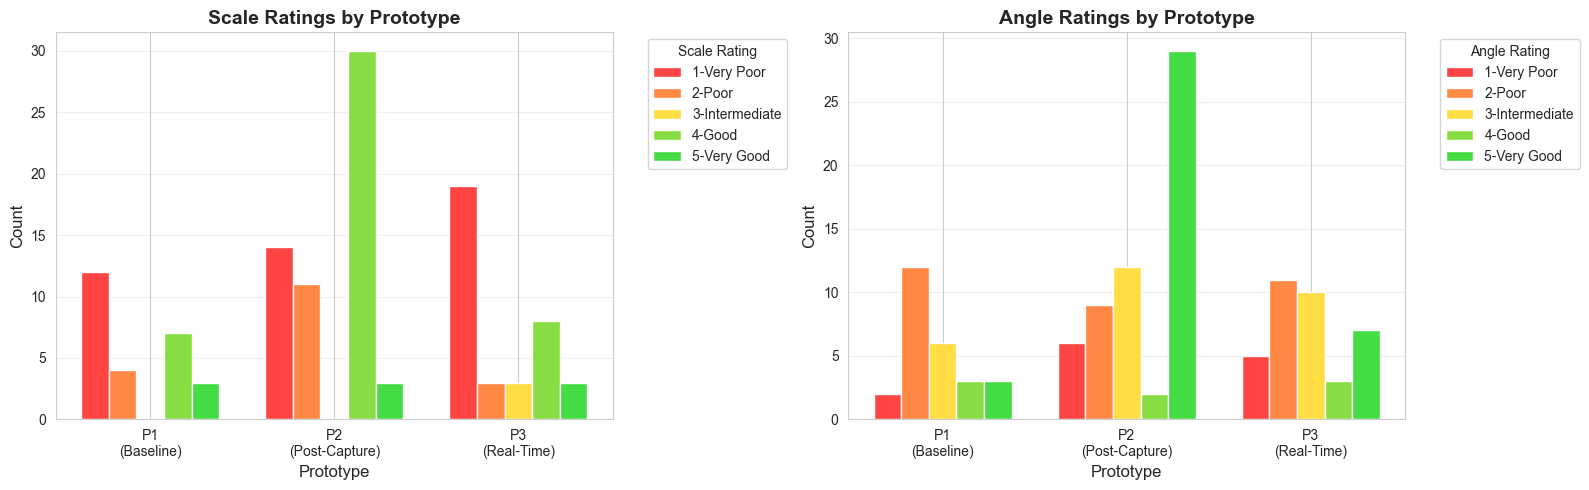

In [9]:
# Create visualizations for manual ratings
rating_labels = {1: '1-Very Poor', 2: '2-Poor', 3: '3-Intermediate', 4: '4-Good', 5: '5-Very Good'}
colors = ['#FF4444', '#FF8844', '#FFDD44', '#88DD44', '#44DD44']

prototypes = ['p1', 'p2', 'p3']

# Short-circuit if no ratings at all
if df_rated[['scale_rating', 'angle_rating']].notna().sum().sum() == 0:
    print('No manual ratings found. Please fill scale_rating and angle_rating in the CSV.')
else:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Scale rating distribution by prototype
    ax1 = axes[0]
    scale_by_proto = df_rated.groupby(['prototype', 'scale_rating']).size().unstack(fill_value=0)
    scale_by_proto = scale_by_proto.reindex(prototypes, fill_value=0)
    ratings_present = sorted([r for r in scale_by_proto.columns if pd.notna(r)])

    x = np.arange(len(prototypes))
    width = 0.15

    if len(ratings_present) > 0 and scale_by_proto.values.sum() > 0:
        for i, rating in enumerate(ratings_present):
            offset = width * (i - len(ratings_present)/2 + 0.5)
            ax1.bar(x + offset, scale_by_proto[rating], width,
                    label=rating_labels.get(int(rating), str(rating)) if rating not in [''] else 'Unknown',
                    color=colors[int(rating)-1] if pd.notna(rating) and rating != '' and int(rating) <= 5 else '#999999')
        ax1.set_xlabel('Prototype', fontsize=12)
        ax1.set_ylabel('Count', fontsize=12)
        ax1.set_title('Scale Ratings by Prototype', fontsize=14, fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(Real-Time)'])
        ax1.legend(title='Scale Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(axis='y', alpha=0.3)
    else:
        ax1.text(0.5, 0.5, 'No scale ratings available', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('Scale Ratings by Prototype', fontsize=14, fontweight='bold')

    # Angle rating distribution by prototype
    ax2 = axes[1]
    angle_by_proto = df_rated.groupby(['prototype', 'angle_rating']).size().unstack(fill_value=0)
    angle_by_proto = angle_by_proto.reindex(prototypes, fill_value=0)
    ratings_present = sorted([r for r in angle_by_proto.columns if pd.notna(r)])

    if len(ratings_present) > 0 and angle_by_proto.values.sum() > 0:
        for i, rating in enumerate(ratings_present):
            offset = width * (i - len(ratings_present)/2 + 0.5)
            ax2.bar(x + offset, angle_by_proto[rating], width,
                    label=rating_labels.get(int(rating), str(rating)) if rating not in [''] else 'Unknown',
                    color=colors[int(rating)-1] if pd.notna(rating) and rating != '' and int(rating) <= 5 else '#999999')
        ax2.set_xlabel('Prototype', fontsize=12)
        ax2.set_ylabel('Count', fontsize=12)
        ax2.set_title('Angle Ratings by Prototype', fontsize=14, fontweight='bold')
        ax2.set_xticks(x)
        ax2.set_xticklabels(['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(Real-Time)'])
        ax2.legend(title='Angle Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax2.grid(axis='y', alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No angle ratings available', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Angle Ratings by Prototype', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

## Correlate Manual Ratings with Automated Metrics

Analyze how manual ratings relate to automated image quality metrics.

C:\Users\megan\AppData\Local\Temp\ipykernel_18448\4072860742.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(filtered_data, labels=labels, patch_artist=True)
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\4072860742.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(filtered_data, labels=labels, patch_artist=True)
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\4072860742.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(filtered_data, labels=labels, patch_artist=True)
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\4072860742.py:61: MatplotlibDeprecatio

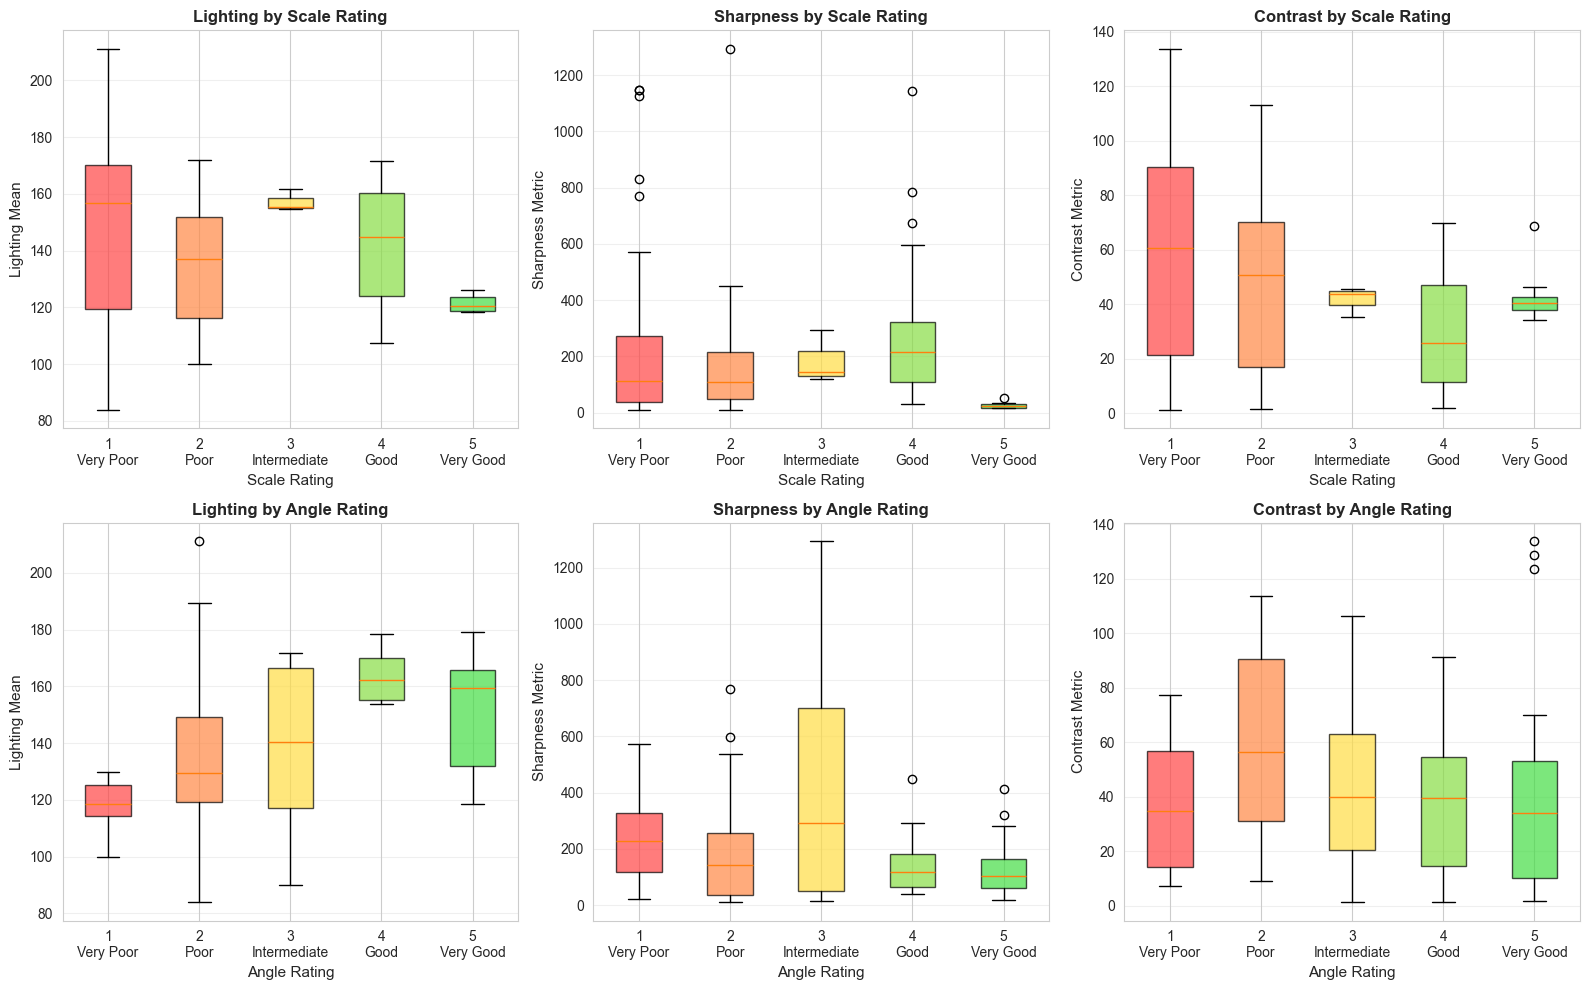

In [10]:
# Compare automated metrics across different manual rating categories
rating_labels = {1: 'Very Poor', 2: 'Poor', 3: 'Intermediate', 4: 'Good', 5: 'Very Good'}

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

metrics_to_analyze = [
    ('lighting_mean', 'Lighting'),
    ('sharpness_metric', 'Sharpness'),
    ('contrast_metric', 'Contrast')
]

# Scale rating vs metrics
for idx, (metric, title) in enumerate(metrics_to_analyze):
    ax = axes[0, idx]
    
    # Group by scale rating (1-5)
    scale_categories = sorted([r for r in df_rated['scale_rating'].dropna().unique() if not pd.isna(r)])
    data_by_scale = [df_rated[df_rated['scale_rating'] == cat][metric].dropna() 
                     for cat in scale_categories]
    
    # Filter out empty arrays and their corresponding labels
    valid_data = [(data, cat) for data, cat in zip(data_by_scale, scale_categories) if len(data) > 0]
    
    if len(valid_data) > 0:
        filtered_data = [item[0] for item in valid_data]
        filtered_categories = [item[1] for item in valid_data]
        labels = [f"{int(cat)}\n{rating_labels.get(cat, '')}" for cat in filtered_categories]
        
        bp = ax.boxplot(filtered_data, labels=labels, patch_artist=True)
        
        # Color gradient from red (poor) to green (good)
        colors = ['#FF4444', '#FF8844', '#FFDD44', '#88DD44', '#44DD44'][:len(filtered_categories)]
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
    else:
        ax.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax.transAxes)
    
    ax.set_xlabel('Scale Rating', fontsize=11)
    ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    ax.set_title(f'{title} by Scale Rating', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

# Angle rating vs metrics
for idx, (metric, title) in enumerate(metrics_to_analyze):
    ax = axes[1, idx]
    
    # Group by angle rating (1-5)
    angle_categories = sorted([r for r in df_rated['angle_rating'].dropna().unique() if not pd.isna(r)])
    data_by_angle = [df_rated[df_rated['angle_rating'] == cat][metric].dropna() 
                     for cat in angle_categories]
    
    # Filter out empty arrays and their corresponding labels
    valid_data = [(data, cat) for data, cat in zip(data_by_angle, angle_categories) if len(data) > 0]
    
    if len(valid_data) > 0:
        filtered_data = [item[0] for item in valid_data]
        filtered_categories = [item[1] for item in valid_data]
        labels = [f"{int(cat)}\n{rating_labels.get(cat, '')}" for cat in filtered_categories]
        
        bp = ax.boxplot(filtered_data, labels=labels, patch_artist=True)
        
        # Color gradient from red (poor) to green (good)
        colors = ['#FF4444', '#FF8844', '#FFDD44', '#88DD44', '#44DD44'][:len(filtered_categories)]
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
    else:
        ax.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax.transAxes)
    ax.set_xlabel('Angle Rating', fontsize=11)
    ax.set_ylabel(metric.replace('_', ' ').title(), fontsize=11)
    ax.set_title(f'{title} by Angle Rating', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Treat scale_rating and angle_rating as metrics (no grouping by rating buckets)
metrics = ['lighting_mean', 'sharpness_metric', 'contrast_metric', 'scale_rating', 'angle_rating']
protos = ['p1', 'p2', 'p3']

print("="*70)
print("AUTOMATED METRICS (INCLUDING RATINGS) BY PROTOTYPE")
print("="*70)

for proto in protos:
    print(f"\nPrototype {proto.upper()}:")
    subset = df_rated[df_rated['prototype'] == proto]
    if subset.empty:
        print("  No data for this prototype")
        continue
    summary = subset[metrics].agg(['mean', 'std', 'count']).round(2)
    print(summary)

# Spearman correlations across metrics, per prototype (ratings included)
print("\n" + "="*70)
print("SPEARMAN CORRELATIONS (METRICS + RATINGS) BY PROTOTYPE")
print("="*70)

from scipy.stats import spearmanr

for proto in protos:
    subset = df_rated[df_rated['prototype'] == proto]
    if subset.empty:
        print(f"\nPrototype {proto.upper()}: no data")
        continue
    print(f"\nPrototype {proto.upper()}:")
    data = subset[metrics].dropna()
    if len(data) < 3:
        print("  Not enough data for correlations")
        continue
    corr_matrix = data.corr(method='spearman').round(3)
    print(corr_matrix)

AUTOMATED METRICS (INCLUDING RATINGS) BY PROTOTYPE

Prototype P1:
       lighting_mean  sharpness_metric  contrast_metric  scale_rating  \
mean          139.70            188.57            47.27          2.42   
std            25.69            209.96            28.49          1.58   
count          26.00             26.00            26.00         26.00   

       angle_rating  
mean           2.73  
std            1.15  
count         26.00  

Prototype P2:
       lighting_mean  sharpness_metric  contrast_metric  scale_rating  \
mean          144.09            244.32            39.21          2.95   
std            25.55            299.66            34.73          1.38   
count          58.00             58.00            58.00         58.00   

       angle_rating  
mean           3.67  
std            1.48  
count         58.00  

Prototype P3:
       lighting_mean  sharpness_metric  contrast_metric  scale_rating  \
mean          139.29            227.37            52.11          2.25

In [12]:
# Statistical significance across prototypes (non-parametric)
from scipy.stats import kruskal

metrics = ['lighting_mean', 'sharpness_metric', 'contrast_metric', 'scale_rating', 'angle_rating']
protos = ['p1', 'p2', 'p3']

print("="*70)
print("KRUSKAL-WALLIS TESTS BY PROTOTYPE")
print("="*70)

for metric in metrics:
    groups = [df_rated[df_rated['prototype'] == proto][metric].dropna() for proto in protos]
    # Keep only groups with at least 2 samples
    groups = [g for g in groups if len(g) >= 2]
    if len(groups) >= 2:
        stat, p_val = kruskal(*groups)
        significance = "significant at 0.05" if p_val < 0.05 else "not significant"
        print(f"{metric:20s}: H = {stat:6.3f}, p = {p_val:.4f} ({significance})")
    else:
        print(f"{metric:20s}: not enough data for test")

KRUSKAL-WALLIS TESTS BY PROTOTYPE
lighting_mean       : H =  0.557, p = 0.7570 (not significant)
sharpness_metric    : H =  1.070, p = 0.5858 (not significant)
contrast_metric     : H =  5.710, p = 0.0576 (not significant)
scale_rating        : H =  6.061, p = 0.0483 (significant at 0.05)
angle_rating        : H = 10.751, p = 0.0046 (significant at 0.05)


## Overall Summary

Combined analysis of automated metrics and manual ratings by prototype.

In [13]:
# Comprehensive summary by prototype
rating_labels = {1: 'Very Poor', 2: 'Poor', 3: 'Intermediate', 4: 'Good', 5: 'Very Good'}

print("="*80)
print("COMPREHENSIVE IMAGE QUALITY SUMMARY BY PROTOTYPE")
print("="*80)

for proto in ['p1', 'p2', 'p3']:
    proto_data = df_rated[df_rated['prototype'] == proto]
    proto_names = {'p1': 'Baseline', 'p2': 'Post-Capture', 'p3': 'Real-Time'}
    
    print(f"\n{'='*80}")
    print(f"PROTOTYPE {proto.upper()} ({proto_names[proto]})")
    print(f"{'='*80}")
    print(f"Total images: {len(proto_data)}")
    
    print(f"\\nAUTOMATED METRICS:")
    print(f"  Lighting:  {proto_data['lighting_mean'].mean():6.2f} ± {proto_data['lighting_mean'].std():.2f}")
    print(f"  Sharpness: {proto_data['sharpness_metric'].mean():6.2f} ± {proto_data['sharpness_metric'].std():.2f}")
    print(f"  Contrast:  {proto_data['contrast_metric'].mean():6.2f} ± {proto_data['contrast_metric'].std():.2f}")
    
    print(f"\\nSCALE RATINGS:")
    print(f"  Mean: {proto_data['scale_rating'].mean():.2f} / 5.00")
    scale_dist = proto_data['scale_rating'].value_counts().sort_index()
    for rating, count in scale_dist.items():
        pct = (count / len(proto_data)) * 100
        label = rating_labels.get(rating, 'Unknown')
        print(f"  {int(rating)} ({label}): {count:3d} ({pct:5.1f}%)")
    
    print(f"\\nANGLE RATINGS:")
    print(f"  Mean: {proto_data['angle_rating'].mean():.2f} / 5.00")
    angle_dist = proto_data['angle_rating'].value_counts().sort_index()
    for rating, count in angle_dist.items():
        pct = (count / len(proto_data)) * 100
        label = rating_labels.get(rating, 'Unknown')
        print(f"  {int(rating)} ({label}): {count:3d} ({pct:5.1f}%)")

print("\n" + "="*80)

COMPREHENSIVE IMAGE QUALITY SUMMARY BY PROTOTYPE

PROTOTYPE P1 (Baseline)
Total images: 26
\nAUTOMATED METRICS:
  Lighting:  139.69 ± 25.69
  Sharpness: 188.57 ± 209.96
  Contrast:   47.27 ± 28.49
\nSCALE RATINGS:
  Mean: 2.42 / 5.00
  1 (Very Poor):  12 ( 46.2%)
  2 (Poor):   4 ( 15.4%)
  4 (Good):   7 ( 26.9%)
  5 (Very Good):   3 ( 11.5%)
\nANGLE RATINGS:
  Mean: 2.73 / 5.00
  1 (Very Poor):   2 (  7.7%)
  2 (Poor):  12 ( 46.2%)
  3 (Intermediate):   6 ( 23.1%)
  4 (Good):   3 ( 11.5%)
  5 (Very Good):   3 ( 11.5%)

PROTOTYPE P2 (Post-Capture)
Total images: 58
\nAUTOMATED METRICS:
  Lighting:  144.09 ± 25.55
  Sharpness: 244.32 ± 299.66
  Contrast:   39.21 ± 34.73
\nSCALE RATINGS:
  Mean: 2.95 / 5.00
  1 (Very Poor):  14 ( 24.1%)
  2 (Poor):  11 ( 19.0%)
  4 (Good):  30 ( 51.7%)
  5 (Very Good):   3 (  5.2%)
\nANGLE RATINGS:
  Mean: 3.67 / 5.00
  1 (Very Poor):   6 ( 10.3%)
  2 (Poor):   9 ( 15.5%)
  3 (Intermediate):  12 ( 20.7%)
  4 (Good):   2 (  3.4%)
  5 (Very Good):  29 ( 50.0

### Final Interpretation (results summary)
- Prototype means: P2 has the highest lighting (144.1) and sharpness (244.3) and the highest user ratings (scale 2.95, angle 3.67). P3 leads on contrast (52.1) but has lower ratings (scale 2.25, angle 2.89). P1 is lowest across ratings and metrics.
- Significance: Kruskal-Wallis shows ratings differ across prototypes (scale p=0.048, angle p=0.0046). Objective metrics are not significant (contrast p≈0.058, lighting/sharpness p>0.5), so rating differences are statistically supported; metric differences are suggestive but not confirmed.
- Overall judgment: P2 is the clear winner versus P1 on both user ratings and two of three metrics. P3 only beats P2 on contrast but lags on ratings; without significant metric differences, P2 is the better overall choice over P1 (and over P3) with current data. If you want stronger evidence on contrast/sharpness, gather more samples to tighten the p-values.

# LaTeX Output for Paper

Generate publication-ready figures for the results section.

C:\Users\megan\AppData\Local\Temp\ipykernel_18448\1422596645.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_proto, labels=prototype_labels, patch_artist=True)
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\1422596645.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_proto, labels=prototype_labels, patch_artist=True)
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\1422596645.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_by_proto, labels=prototype_labels, patch_artist=True)
C:\Users\megan\AppData\Local\Temp\ipykernel_18448\14225966

Saved boxplot figure to: metrics_boxplots_by_prototype.png and .pdf


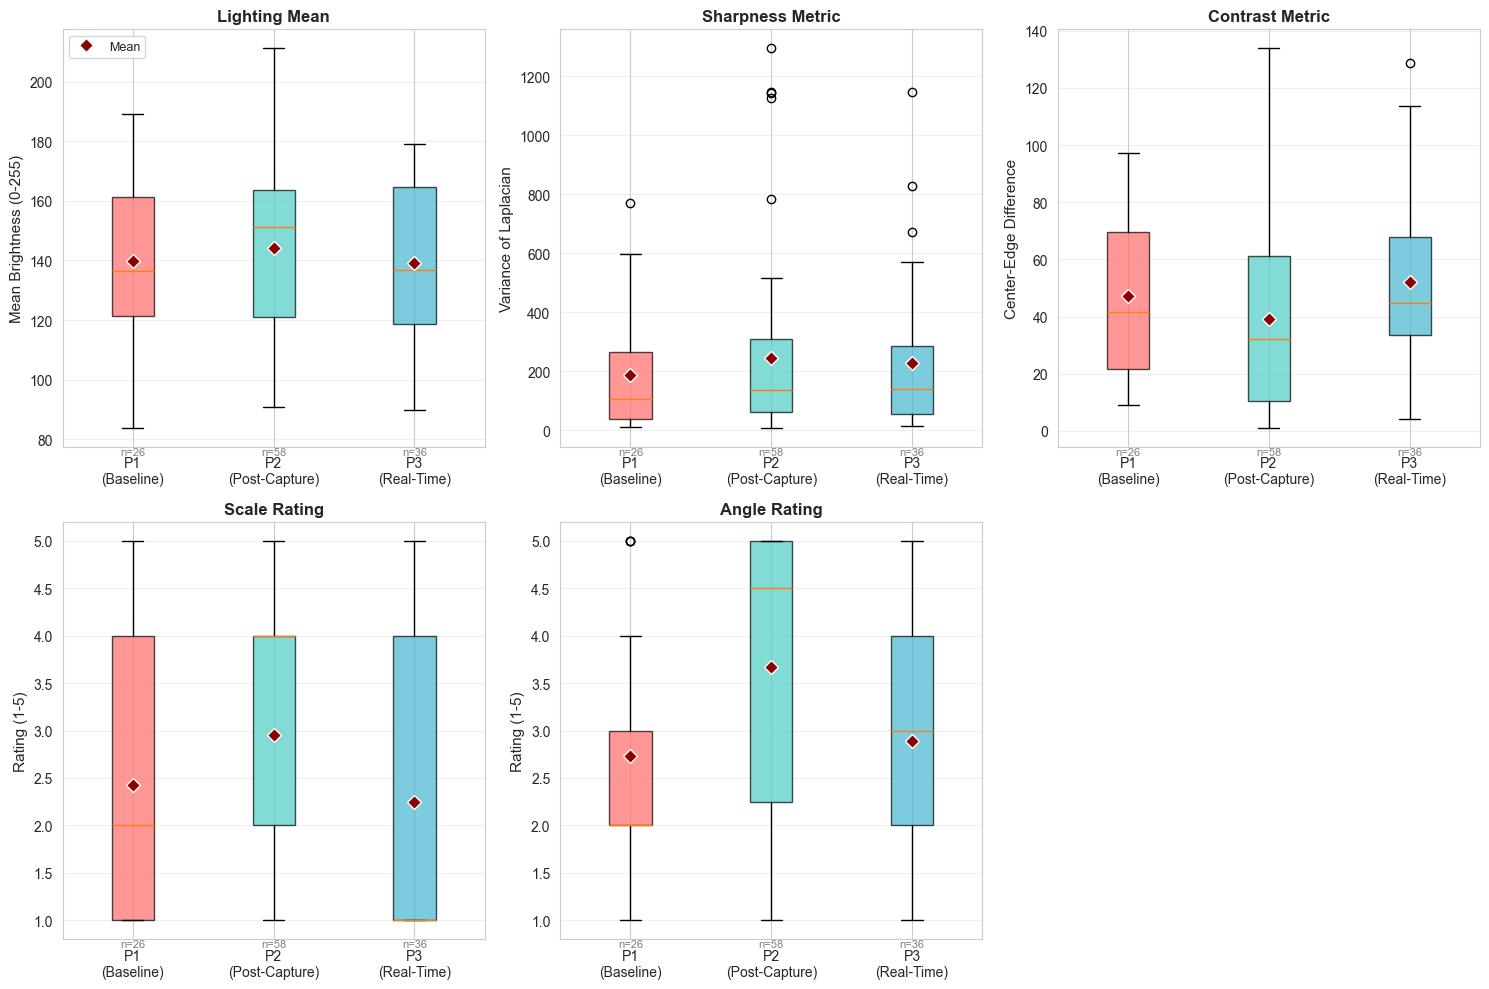


LaTeX Figure Code (Boxplots):
\begin{figure}[htbp]
\centering
\includegraphics[width=\textwidth]{metrics_boxplots_by_prototype.pdf}
\caption{Distribution of image quality metrics across the three prototypes. Boxplots show median (center line), interquartile range (box), and outliers (whiskers). Red diamonds indicate mean values. P1 (Baseline) had no real-time feedback, P2 (Post-Capture) provided feedback after image capture, and P3 (Real-Time) provided continuous feedback during capture. Sample sizes (n) are shown below each box.}
\label{fig:metrics_boxplots}
\end{figure}

Saved LaTeX figure code to: latex_metrics_boxplots.tex


In [14]:
# Figure 1: Boxplots of all five image quality metrics by prototype
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for publication
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metrics_info = [
    ('lighting_mean', 'Lighting Mean', 'Mean Brightness (0-255)'),
    ('sharpness_metric', 'Sharpness Metric', 'Variance of Laplacian'),
    ('contrast_metric', 'Contrast Metric', 'Center-Edge Difference'),
    ('scale_rating', 'Scale Rating', 'Rating (1-5)'),
    ('angle_rating', 'Angle Rating', 'Rating (1-5)')
]

prototypes = ['p1', 'p2', 'p3']
prototype_labels = ['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(Real-Time)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (metric, title, ylabel) in enumerate(metrics_info):
    ax = axes[idx]
    
    # Prepare data for boxplot
    data_by_proto = [df_rated[df_rated['prototype'] == p][metric].dropna() for p in prototypes]
    
    # Create boxplot
    bp = ax.boxplot(data_by_proto, labels=prototype_labels, patch_artist=True)
    
    # Color boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Add mean markers
    means = [df_rated[df_rated['prototype'] == p][metric].mean() for p in prototypes]
    ax.plot(range(1, 4), means, 'D', color='darkred', markersize=7, 
            label='Mean', zorder=5, markeredgecolor='white', markeredgewidth=1)
    
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Add sample sizes
    for i, proto in enumerate(prototypes):
        n = len(df_rated[df_rated['prototype'] == proto][metric].dropna())
        ax.text(i + 1, ax.get_ylim()[0], f'n={n}', 
               ha='center', va='top', fontsize=8, color='gray')
    
    if idx == 0:
        ax.legend(loc='upper left', fontsize=9)

# Hide the 6th subplot (we only have 5 metrics)
axes[5].axis('off')

plt.tight_layout()

# Save figure
plt.savefig('metrics_boxplots_by_prototype.png', dpi=300, bbox_inches='tight')
plt.savefig('metrics_boxplots_by_prototype.pdf', bbox_inches='tight')
print("Saved boxplot figure to: metrics_boxplots_by_prototype.png and .pdf")

plt.show()

# Generate LaTeX figure code
latex_figure_boxplot = r"""\begin{figure}[htbp]
\centering
\includegraphics[width=\textwidth]{metrics_boxplots_by_prototype.pdf}
\caption{Distribution of image quality metrics across the three prototypes. Boxplots show median (center line), interquartile range (box), and outliers (whiskers). Red diamonds indicate mean values. P1 (Baseline) had no real-time feedback, P2 (Post-Capture) provided feedback after image capture, and P3 (Real-Time) provided continuous feedback during capture. Sample sizes (n) are shown below each box.}
\label{fig:metrics_boxplots}
\end{figure}"""

print("\n" + "="*80)
print("LaTeX Figure Code (Boxplots):")
print(latex_figure_boxplot)
print("="*80 + "\n")

# Save LaTeX code to file
with open("latex_metrics_boxplots.tex", "w") as f:
    f.write(latex_figure_boxplot)
print("Saved LaTeX figure code to: latex_metrics_boxplots.tex")

Saved scatter plot figure to: metrics_scatter_by_prototype.png and .pdf


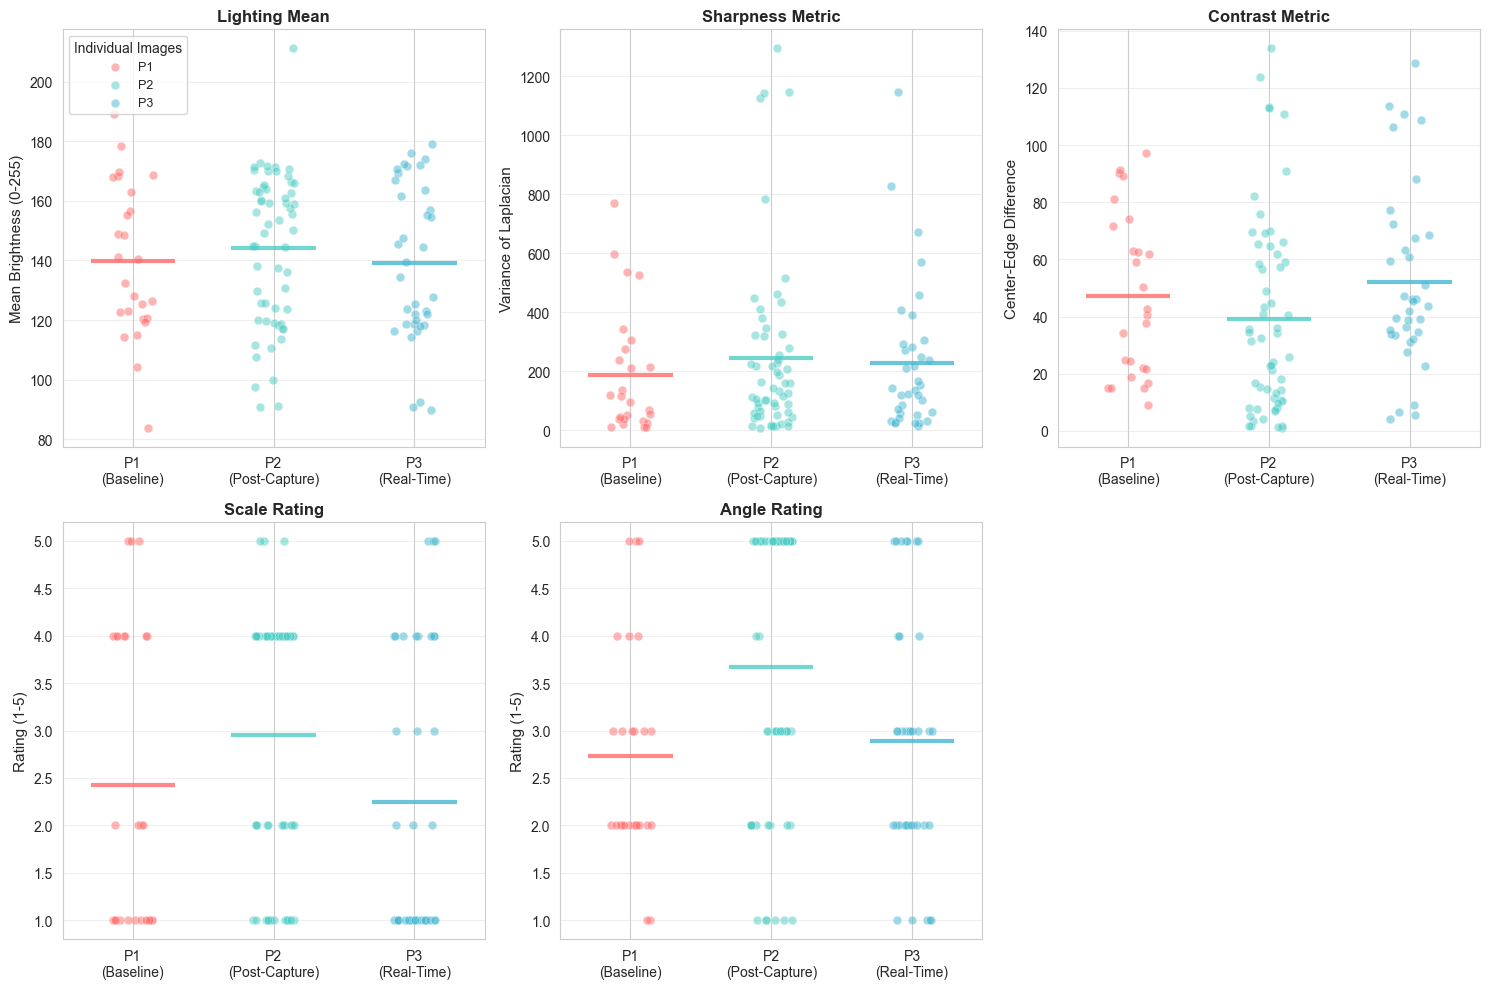


LaTeX Figure Code (Scatter Plots):
\begin{figure}[htbp]
\centering
\includegraphics[width=\textwidth]{metrics_scatter_by_prototype.pdf}
\caption{Individual image quality scores by prototype. Each point represents one image, with horizontal jittering applied to reduce overlap. Horizontal bars indicate the mean value for each prototype. This visualization shows the distribution and variability of individual images within each prototype condition.}
\label{fig:metrics_scatter}
\end{figure}

Saved LaTeX figure code to: latex_metrics_scatter.tex


In [15]:
# Figure 2: Jittered scatter plots showing individual image scores
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

metrics_info = [
    ('lighting_mean', 'Lighting Mean', 'Mean Brightness (0-255)'),
    ('sharpness_metric', 'Sharpness Metric', 'Variance of Laplacian'),
    ('contrast_metric', 'Contrast Metric', 'Center-Edge Difference'),
    ('scale_rating', 'Scale Rating', 'Rating (1-5)'),
    ('angle_rating', 'Angle Rating', 'Rating (1-5)')
]

prototypes = ['p1', 'p2', 'p3']
prototype_positions = [1, 2, 3]
prototype_labels = ['P1\n(Baseline)', 'P2\n(Post-Capture)', 'P3\n(Real-Time)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
jitter_amount = 0.15  # Amount of horizontal jitter

np.random.seed(42)  # For reproducible jitter

for idx, (metric, title, ylabel) in enumerate(metrics_info):
    ax = axes[idx]
    
    # Plot individual points with jitter for each prototype
    for i, proto in enumerate(prototypes):
        data = df_rated[df_rated['prototype'] == proto][metric].dropna()
        n = len(data)
        
        if n > 0:
            # Add random jitter to x-position
            x_positions = prototype_positions[i] + np.random.uniform(-jitter_amount, jitter_amount, n)
            
            # Plot points
            ax.scatter(x_positions, data, alpha=0.5, s=40, color=colors[i], 
                      edgecolors='white', linewidth=0.5, label=f'P{i+1}' if idx == 0 else '')
            
            # Add mean line
            mean_val = data.mean()
            ax.hlines(mean_val, prototype_positions[i] - 0.3, prototype_positions[i] + 0.3, 
                     colors=colors[i], linewidth=3, alpha=0.8, zorder=10)
    
    ax.set_ylabel(ylabel, fontsize=11)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xticks(prototype_positions)
    ax.set_xticklabels(prototype_labels)
    ax.set_xlim(0.5, 3.5)
    ax.grid(axis='y', alpha=0.3)
    
    if idx == 0:
        ax.legend(loc='upper left', fontsize=9, title='Individual Images')

# Hide the 6th subplot
axes[5].axis('off')

plt.tight_layout()

# Save figure
plt.savefig('metrics_scatter_by_prototype.png', dpi=300, bbox_inches='tight')
plt.savefig('metrics_scatter_by_prototype.pdf', bbox_inches='tight')
print("Saved scatter plot figure to: metrics_scatter_by_prototype.png and .pdf")

plt.show()

# Generate LaTeX figure code
latex_figure_scatter = r"""\begin{figure}[htbp]
\centering
\includegraphics[width=\textwidth]{metrics_scatter_by_prototype.pdf}
\caption{Individual image quality scores by prototype. Each point represents one image, with horizontal jittering applied to reduce overlap. Horizontal bars indicate the mean value for each prototype. This visualization shows the distribution and variability of individual images within each prototype condition.}
\label{fig:metrics_scatter}
\end{figure}"""

print("\n" + "="*80)
print("LaTeX Figure Code (Scatter Plots):")
print(latex_figure_scatter)
print("="*80 + "\n")

# Save LaTeX code to file
with open("latex_metrics_scatter.tex", "w") as f:
    f.write(latex_figure_scatter)
print("Saved LaTeX figure code to: latex_metrics_scatter.tex")

## Instructions for LaTeX

The above cells generate:

1. **Boxplots Figure** (`metrics_boxplots_by_prototype.pdf` and `latex_metrics_boxplots.tex`): Shows all five image quality metrics (lighting mean, sharpness metric, contrast metric, scale rating, angle rating) as boxplots grouped by prototype. Includes mean markers (red diamonds) and sample sizes.

2. **Scatter Plots Figure** (`metrics_scatter_by_prototype.pdf` and `latex_metrics_scatter.tex`): Shows individual image scores with horizontal jittering to reduce overlap. Horizontal bars indicate mean values for each prototype. This gives a complete view of the data distribution.

**Required LaTeX packages:**
```latex
\usepackage{graphicx}  % for \includegraphics
```

**To use in your paper:**
- Copy the `.pdf` files to your LaTeX project directory
- Use `\input{latex_metrics_boxplots.tex}` or `\input{latex_metrics_scatter.tex}` to include the figures
- Or copy the LaTeX code directly into your document
- Reference the figures in text with `\ref{fig:metrics_boxplots}` and `\ref{fig:metrics_scatter}`

**Note:** Make sure you've executed all previous cells in this notebook to load the `df_rated` DataFrame with your data before running these visualization cells.